# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**We want to find out all the features which affect the used car price.**

Given is the vehicle dataset. 
1. Understand the features and the data
2. Cleanup the data records and columns
3. Create the models which can predict the price of used car based on the features provided 
4. Report the most influential features based on the models built.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

**Steps for Data Understanding**
  
1. Check the data by taking samples 
2. Find out how many features and data rows are available 
3. Check the data types for the features
4. Check the quality of data such as duplicates and null values
5. Visualization wherever required

In [4]:
 #Importing Required packages

import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error 
from sklearn.inspection import permutation_importance 
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
set_config(display="diagram")
warnings.filterwarnings('ignore')
%matplotlib inline


In [5]:
# Importing the provided car dataset 

df = pd.read_csv("data/vehicles.csv") 
df.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
238328,7304384385,greensboro,10999,2013.0,kia,sorento sx,NaN,6 cylinders,gas,143300.0,clean,automatic,5XYKW4A2XDG323907,fwd,NaN,SUV,grey,nc
289845,7314141336,cincinnati,28500,1937.0,chevrolet,coupe,NaN,NaN,gas,88000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,oh
326943,7310930369,salem,19995,2008.0,toyota,tundra,NaN,NaN,gas,127423.0,clean,automatic,5TFBV54158X048378,4wd,NaN,pickup,NaN,or
2616,7316166272,huntsville / decatur,19940,2016.0,toyota,sienna,NaN,6 cylinders,gas,108249.0,clean,automatic,5TDYK3DCXGS709206,fwd,NaN,van,grey,al
95381,7310973969,ft myers / SW florida,27990,2018.0,mazda,mx-5 miata grand touring,good,NaN,gas,6745.0,clean,other,JM1NDAD75J0205967,rwd,NaN,convertible,black,fl
220804,7303709856,joplin,0,2012.0,nissan,altima,like new,4 cylinders,gas,131549.0,clean,automatic,NaN,fwd,mid-size,sedan,silver,mo
135438,7311482879,pullman / moscow,3995,2001.0,toyota,camry,good,4 cylinders,gas,207861.0,clean,automatic,4T1BG22KX1U815603,fwd,NaN,sedan,green,id
334890,7309164637,philadelphia,6200,2012.0,ford,escape xlt,good,4 cylinders,gas,137030.0,clean,automatic,1FMCU9D79CKB63196,4wd,full-size,SUV,grey,pa
110206,7307748036,sarasota-bradenton,5900,2004.0,toyota,rav4,NaN,NaN,gas,168000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,fl
174665,7314244388,baton rouge,500,2002.0,lexus,gl300,like new,6 cylinders,gas,186777.0,clean,automatic,NaN,fwd,compact,sedan,white,la


In [6]:
# We will check about how many reacords and features are present in the dataset

df.shape

(426880, 18)

In [7]:
# Check the datatypes for the features 

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [8]:
#Checking the null values in the dataset

df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [9]:
# null value in percentage

df_null_percentage = pd.DataFrame(df.isnull().sum() / df.shape[0] * 100, columns = ['Percentage NUll Values'])
df_null_percentage

,Percentage NUll Values
id,0.000000
region,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,40.785232
cylinders,41.622470
fuel,0.705819
odometer,1.030735


In [10]:
# Evaluating data values 

df['model'].value_counts()


model
f-150                      8009
silverado 1500             5140
1500                       4211
camry                      3135
silverado                  3023
                           ... 
plymouth fury 1               1
f550 box truck delivery       1
duramax 2500hd                1
3 s sport                     1
Paige Glenbrook Touring       1
Name: count, Length: 29649, dtype: int64

In [11]:
# Evaluating data values 

df['manufacturer'].value_counts()

manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin

In [12]:
# Evaluating data values 

df['title_status'].value_counts()

title_status
clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: int64

In [13]:
# Evaluating data values 

df.groupby('region').agg(['count'])['price']

,count
region,
SF bay area,2936
abilene,235
akron / canton,2211
albany,2537
albuquerque,2952
...,...
york,777
youngstown,664
yuba-sutter,1747


In [14]:
# Evaluating data values 

df['fuel'].value_counts()

fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64

In [15]:
# Evaluating data values 

df['transmission'].value_counts()

transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

**Data Cleanup**

1. Id , VIN  columns will not help in the model so deleting these . 
2. Also almost 72% values for Size are null so we will delete Size as well.
3. Model column will not help as it has too much variance so deleting model column
4. Records with price 0 will not help so deleting records with price 0.

In [16]:
# Deleting ID, VIN size and model

df = df.drop(['id','VIN','size','model'], axis = 1)
df

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [17]:
# Considering data which has price greater than 0 
df = df[df['price'] > 0]
df

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [18]:
# Dropping null values
df = df.dropna()
df

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
32,auburn,27990,2012.0,gmc,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al
33,auburn,34590,2016.0,chevrolet,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al
34,auburn,35000,2019.0,toyota,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al
35,auburn,29990,2016.0,chevrolet,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,wyoming,48590,2020.0,cadillac,good,6 cylinders,gas,7701.0,clean,other,fwd,other,black,wy
426860,wyoming,39990,2017.0,infiniti,good,8 cylinders,gas,41664.0,clean,automatic,4wd,other,black,wy
426866,wyoming,32990,2016.0,infiniti,good,8 cylinders,gas,55612.0,clean,automatic,rwd,other,black,wy
426874,wyoming,33590,2018.0,lexus,good,6 cylinders,gas,30814.0,clean,automatic,rwd,sedan,white,wy


In [19]:
# Considering Cars newer than year 2000 

df = df[df['year'] > 2000]
df 

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
32,auburn,27990,2012.0,gmc,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al
33,auburn,34590,2016.0,chevrolet,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al
34,auburn,35000,2019.0,toyota,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al
35,auburn,29990,2016.0,chevrolet,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,wyoming,48590,2020.0,cadillac,good,6 cylinders,gas,7701.0,clean,other,fwd,other,black,wy
426860,wyoming,39990,2017.0,infiniti,good,8 cylinders,gas,41664.0,clean,automatic,4wd,other,black,wy
426866,wyoming,32990,2016.0,infiniti,good,8 cylinders,gas,55612.0,clean,automatic,rwd,other,black,wy
426874,wyoming,33590,2018.0,lexus,good,6 cylinders,gas,30814.0,clean,automatic,rwd,sedan,white,wy


**Plotting Price Histogram**

array([[<Axes: title={'center': 'price'}>]], dtype=object)

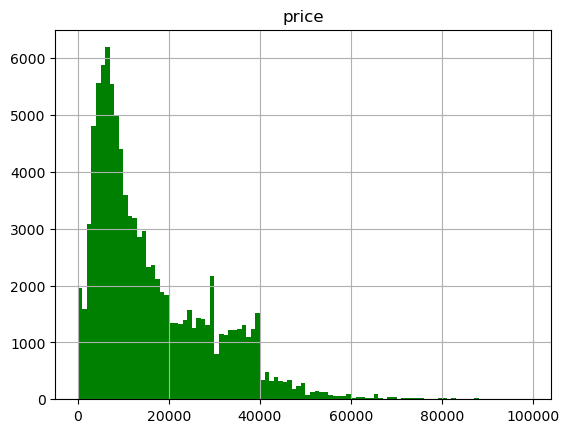

In [20]:
bins = range(0,100000,1000)
df.hist(column='price', color='green', bins=bins)

**Plotting Year histogram**

array([[<Axes: title={'center': 'year'}>]], dtype=object)

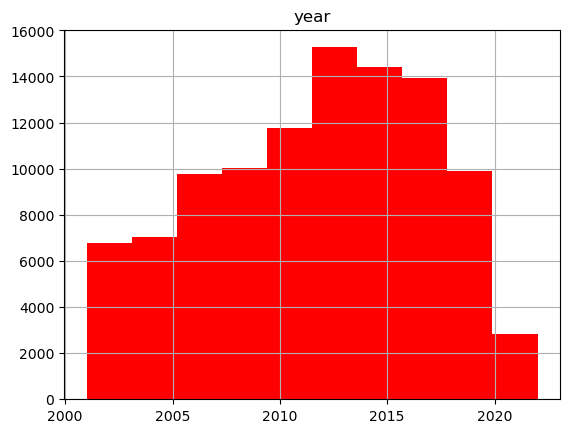

In [21]:
df.hist(column='year', color='red')

In [22]:
# After looking at data decided to take cars which have atleast some odometer reading

df = df[df['odometer'] > 100]
df 

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
32,auburn,27990,2012.0,gmc,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al
33,auburn,34590,2016.0,chevrolet,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al
34,auburn,35000,2019.0,toyota,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al
35,auburn,29990,2016.0,chevrolet,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,wyoming,48590,2020.0,cadillac,good,6 cylinders,gas,7701.0,clean,other,fwd,other,black,wy
426860,wyoming,39990,2017.0,infiniti,good,8 cylinders,gas,41664.0,clean,automatic,4wd,other,black,wy
426866,wyoming,32990,2016.0,infiniti,good,8 cylinders,gas,55612.0,clean,automatic,rwd,other,black,wy
426874,wyoming,33590,2018.0,lexus,good,6 cylinders,gas,30814.0,clean,automatic,rwd,sedan,white,wy


**PLotting Odometer Histogram**

array([[<Axes: title={'center': 'odometer'}>]], dtype=object)

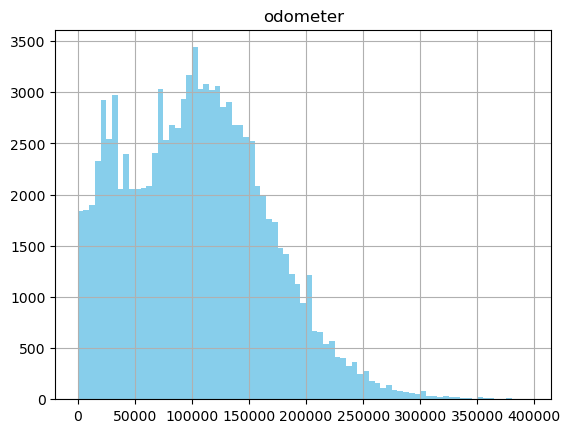

In [23]:
bins = range(0,400000,5000)
df.hist(column='odometer', color='skyblue', bins=bins)

**Converting Cylinder into a numeric field**

In [24]:
df.loc[df['cylinders'] == '8 cylinders', 'cylinders'] = '8'
df.loc[df['cylinders'] == '6 cylinders', 'cylinders'] = '6'
df.loc[df['cylinders'] == '4 cylinders', 'cylinders'] = '4'
df.loc[df['cylinders'] == '5 cylinders', 'cylinders'] = '5'
df.loc[df['cylinders'] == '3 cylinders', 'cylinders'] = '3'
df.loc[df['cylinders'] == '10 cylinders', 'cylinders'] = '10'
df.loc[df['cylinders'] == '12 cylinders', 'cylinders'] = '12'
df.loc[df['cylinders'] == 'other', 'cylinders'] = '0'
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='raise')
df = df[df['cylinders'] > 0]
df

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
31,auburn,15000,2013.0,ford,excellent,6,gas,128000.0,clean,automatic,rwd,truck,black,al
32,auburn,27990,2012.0,gmc,good,8,gas,68696.0,clean,other,4wd,pickup,black,al
33,auburn,34590,2016.0,chevrolet,good,6,gas,29499.0,clean,other,4wd,pickup,silver,al
34,auburn,35000,2019.0,toyota,excellent,6,gas,43000.0,clean,automatic,4wd,truck,grey,al
35,auburn,29990,2016.0,chevrolet,good,6,gas,17302.0,clean,other,4wd,pickup,red,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,wyoming,48590,2020.0,cadillac,good,6,gas,7701.0,clean,other,fwd,other,black,wy
426860,wyoming,39990,2017.0,infiniti,good,8,gas,41664.0,clean,automatic,4wd,other,black,wy
426866,wyoming,32990,2016.0,infiniti,good,8,gas,55612.0,clean,automatic,rwd,other,black,wy
426874,wyoming,33590,2018.0,lexus,good,6,gas,30814.0,clean,automatic,rwd,sedan,white,wy


**By looking at the data , decided to take data with "clean" title only as there are not enough records for other title type**

In [25]:
df = df[df['title_status'] == 'clean']
df


,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
31,auburn,15000,2013.0,ford,excellent,6,gas,128000.0,clean,automatic,rwd,truck,black,al
32,auburn,27990,2012.0,gmc,good,8,gas,68696.0,clean,other,4wd,pickup,black,al
33,auburn,34590,2016.0,chevrolet,good,6,gas,29499.0,clean,other,4wd,pickup,silver,al
34,auburn,35000,2019.0,toyota,excellent,6,gas,43000.0,clean,automatic,4wd,truck,grey,al
35,auburn,29990,2016.0,chevrolet,good,6,gas,17302.0,clean,other,4wd,pickup,red,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,wyoming,48590,2020.0,cadillac,good,6,gas,7701.0,clean,other,fwd,other,black,wy
426860,wyoming,39990,2017.0,infiniti,good,8,gas,41664.0,clean,automatic,4wd,other,black,wy
426866,wyoming,32990,2016.0,infiniti,good,8,gas,55612.0,clean,automatic,rwd,other,black,wy
426874,wyoming,33590,2018.0,lexus,good,6,gas,30814.0,clean,automatic,rwd,sedan,white,wy


**Decided to not consider transmission and paint_color attributes based on data evaluations**

In [26]:
df = df.drop(['title_status','transmission','paint_color'], axis = 1)
df

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,drive,type,state
31,auburn,15000,2013.0,ford,excellent,6,gas,128000.0,rwd,truck,al
32,auburn,27990,2012.0,gmc,good,8,gas,68696.0,4wd,pickup,al
33,auburn,34590,2016.0,chevrolet,good,6,gas,29499.0,4wd,pickup,al
34,auburn,35000,2019.0,toyota,excellent,6,gas,43000.0,4wd,truck,al
35,auburn,29990,2016.0,chevrolet,good,6,gas,17302.0,4wd,pickup,al
...,...,...,...,...,...,...,...,...,...,...,...
426859,wyoming,48590,2020.0,cadillac,good,6,gas,7701.0,fwd,other,wy
426860,wyoming,39990,2017.0,infiniti,good,8,gas,41664.0,4wd,other,wy
426866,wyoming,32990,2016.0,infiniti,good,8,gas,55612.0,rwd,other,wy
426874,wyoming,33590,2018.0,lexus,good,6,gas,30814.0,rwd,sedan,wy


In [27]:
df.condition.unique()

array(['excellent', 'good', 'new', 'like new', 'fair', 'salvage'],
      dtype=object)

**Decided to convert condition into numeric field**

In [28]:
df.loc[df['condition'] == 'new', 'condition'] = '6'
df.loc[df['condition'] == 'like new', 'condition'] = '5'
df.loc[df['condition'] == 'excellent', 'condition'] = '4'
df.loc[df['condition'] == 'good', 'condition'] = '3'
df.loc[df['condition'] == 'fair', 'condition'] = '2'
df.loc[df['condition'] == 'salvage', 'condition'] = '1'
df['condition'] = pd.to_numeric(df['condition'], errors='raise')
df = df[df['condition'] > 0]
df

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,drive,type,state
31,auburn,15000,2013.0,ford,4,6,gas,128000.0,rwd,truck,al
32,auburn,27990,2012.0,gmc,3,8,gas,68696.0,4wd,pickup,al
33,auburn,34590,2016.0,chevrolet,3,6,gas,29499.0,4wd,pickup,al
34,auburn,35000,2019.0,toyota,4,6,gas,43000.0,4wd,truck,al
35,auburn,29990,2016.0,chevrolet,3,6,gas,17302.0,4wd,pickup,al
...,...,...,...,...,...,...,...,...,...,...,...
426859,wyoming,48590,2020.0,cadillac,3,6,gas,7701.0,fwd,other,wy
426860,wyoming,39990,2017.0,infiniti,3,8,gas,41664.0,4wd,other,wy
426866,wyoming,32990,2016.0,infiniti,3,8,gas,55612.0,rwd,other,wy
426874,wyoming,33590,2018.0,lexus,3,6,gas,30814.0,rwd,sedan,wy


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95325 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        95325 non-null  object 
 1   price         95325 non-null  int64  
 2   year          95325 non-null  float64
 3   manufacturer  95325 non-null  object 
 4   condition     95325 non-null  int64  
 5   cylinders     95325 non-null  int64  
 6   fuel          95325 non-null  object 
 7   odometer      95325 non-null  float64
 8   drive         95325 non-null  object 
 9   type          95325 non-null  object 
 10  state         95325 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 8.7+ MB


In [30]:
df

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,drive,type,state
31,auburn,15000,2013.0,ford,4,6,gas,128000.0,rwd,truck,al
32,auburn,27990,2012.0,gmc,3,8,gas,68696.0,4wd,pickup,al
33,auburn,34590,2016.0,chevrolet,3,6,gas,29499.0,4wd,pickup,al
34,auburn,35000,2019.0,toyota,4,6,gas,43000.0,4wd,truck,al
35,auburn,29990,2016.0,chevrolet,3,6,gas,17302.0,4wd,pickup,al
...,...,...,...,...,...,...,...,...,...,...,...
426859,wyoming,48590,2020.0,cadillac,3,6,gas,7701.0,fwd,other,wy
426860,wyoming,39990,2017.0,infiniti,3,8,gas,41664.0,4wd,other,wy
426866,wyoming,32990,2016.0,infiniti,3,8,gas,55612.0,rwd,other,wy
426874,wyoming,33590,2018.0,lexus,3,6,gas,30814.0,rwd,sedan,wy


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

**Evaluating Linear Regression Model**

In [31]:
# Drop target variable
X = df.drop('price', axis=1) 
y = df['price']

In [32]:
# create train and test sets 
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.7, random_state=8) 
print('Shape of X training: ', X_tr.shape ) 
print('Shape of y training: ', y_tr.shape ) 
print('Shape of X testing: ', X_te.shape ) 
print('Shape of y testing: ', y_te.shape ) 

Shape of X training:  (66727, 10)
Shape of y training:  (66727,)
Shape of X testing:  (28598, 10)
Shape of y testing:  (28598,)


In [33]:
cat_features = ['region','manufacturer','fuel','drive','type','state']

num_features = ['year', 'condition', 'cylinders', 'odometer']
# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', make_pipeline(SimpleImputer(), StandardScaler(), PolynomialFeatures(degree=3, include_bias=False)), num_features),
        ('categoric', make_pipeline(OneHotEncoder()), cat_features)
    ])

# Create pipeline
pipe_1 = Pipeline([('preprocessor', preprocessor),('Model',LinearRegression())])
pipe_1.fit(X_tr,y_tr)
pipe_1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False))]),
                                                  ['year', 'condition',
                                                   'cylinders', 'odometer']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['region', 'manufacturer',
                                                   'fuel', 'drive', 'type',
                                                   'state'])])),
                ('Model', LinearRegression())])

In [34]:
# prediction for training as well as testing
y_tr_pred = pipe_1.predict(X_tr)
y_te_pred = pipe_1.predict(X_te)

In [35]:
#Calculte MSE

training_MSE = mean_squared_error(y_tr, y_tr_pred)
test_MSE = mean_squared_error(y_te, y_te_pred)
print('Training MSE: ',training_MSE)
print('Testing MSE: ', test_MSE)

Training MSE:  209291431796789.9
Testing MSE:  280822271427.3136


In [36]:
perm_imp = permutation_importance(pipe_1, X_te, y_te)
imp = pd.DataFrame(data=perm_imp.importances_mean, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(imp)

              Importance
cylinders       2.800927
manufacturer    1.822149
year            1.676918
type            1.222384
condition       0.575073
fuel            0.484710
drive           0.030382
odometer       -0.150012
region         -0.939992
state          -0.990789


**Evaluating Ridge Model checking which alpha will work better**

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', make_pipeline(PolynomialFeatures(degree=3, include_bias=False), StandardScaler()), num_features),
        ('cat', make_pipeline(OneHotEncoder()), cat_features)
    ])

parameters_to_try = {'regressor__alpha': [0.1, 1, 10, 100, 1000]}
grid_search_cv = GridSearchCV(
    estimator=TransformedTargetRegressor(regressor = Ridge(max_iter=100), func=np.log1p, inverse_func=np.expm1),
    param_grid=parameters_to_try,
    scoring='neg_mean_squared_error',
    cv=[[list(range(len(X_tr))), list(range(len(X_te)))]])

# Create a pipeline with the grid search
grid_search_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('grid_search', grid_search_cv)
])

grid_search_pipe.fit(X_tr, y_tr)

#Print the best parameters
print("Best params:", grid_search_pipe.named_steps['grid_search'].best_params_)

#Print the best score
print("Best score:", -grid_search_pipe.named_steps['grid_search'].best_score_)


Best params: {'regressor__alpha': 100}
Best score: 488952613513086.7


In [38]:
cat_features = ['region','manufacturer','fuel','drive','type','state']

num_features = ['year', 'condition', 'cylinders', 'odometer']
# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', make_pipeline(SimpleImputer(), StandardScaler(), PolynomialFeatures(degree=3, include_bias=False)), num_features),
        ('categoric', make_pipeline(OneHotEncoder()), cat_features)
    ])

# Create pipeline
pipe_1 = Pipeline([('preprocessor', preprocessor),('Model',Ridge(alpha=100))])
pipe_1.fit(X_tr,y_tr)
pipe_1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False))]),
                                                  ['year', 'condition',
                                                   'cylinders', 'odometer']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['region', 'manufacturer',
                                                   'fuel', 'drive', 'type',
                                                   'state'])])),
                ('Model', Ridge(alpha=100))])

In [39]:
# prediction for training as well as testing
y_tr_pred = pipe_1.predict(X_tr)
y_te_pred = pipe_1.predict(X_te)

In [40]:
#Calculte MSE

training_MSE = mean_squared_error(y_tr, y_tr_pred)
test_MSE = mean_squared_error(y_te, y_te_pred)
print('Training MSE: ',training_MSE)
print('Testing MSE: ', test_MSE)

Training MSE:  208799320901582.22
Testing MSE:  516907155768.854


In [41]:
perm_imp = permutation_importance(pipe_1, X_te, y_te)
imp = pd.DataFrame(data=perm_imp.importances_mean, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(imp)

              Importance
manufacturer    2.380555
cylinders       1.656661
type            1.126669
year            0.965769
condition       0.599324
fuel            0.350911
odometer        0.096263
drive          -0.058195
region         -3.950397
state          -4.200993


**Evalutaing Lasso model . Checking which alpha will work better**

In [45]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', make_pipeline(PolynomialFeatures(degree=3, include_bias=False), StandardScaler()), num_features),
        ('cat', make_pipeline(OneHotEncoder()), cat_features)
    ])

parameters_to_try = {'regressor__alpha': [0.1, 1, 10, 100, 1000]}
grid_search_cv = GridSearchCV(
    estimator=TransformedTargetRegressor(regressor = Lasso(max_iter=100), func=np.log1p, inverse_func=np.expm1),
    param_grid=parameters_to_try,
    scoring='neg_mean_squared_error',
    cv=[[list(range(len(X_tr))), list(range(len(X_te)))]])

# Create a pipeline with the grid search
grid_search_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('grid_search', grid_search_cv)
])

grid_search_pipe.fit(X_tr, y_tr)

#Print the best parameters
print("Best params:", grid_search_pipe.named_steps['grid_search'].best_params_)

#Print the best score
print("Best score:", -grid_search_pipe.named_steps['grid_search'].best_score_)

Best params: {'regressor__alpha': 1}
Best score: 488953389377360.75


In [46]:
cat_features = ['region','manufacturer','fuel','drive','type','state']

num_features = ['year', 'condition', 'cylinders', 'odometer']
# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', make_pipeline(SimpleImputer(), StandardScaler(), PolynomialFeatures(degree=3, include_bias=False)), num_features),
        ('categoric', make_pipeline(OneHotEncoder()), cat_features)
    ])

# Create pipeline
pipe_1 = Pipeline([('preprocessor', preprocessor),('regressor',Lasso(alpha=1))])
pipe_1.fit(X_tr,y_tr)
pipe_1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False))]),
                                                  ['year', 'condition',
                                                   'cylinders', 'odometer']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['region', 'manufacturer',
                                                   'fuel', 'drive', 'type',
                                                   'state'])])),
                ('regressor', Lasso(alpha=1))])

In [47]:
# prediction for training as well as testing
y_tr_pred = pipe_1.predict(X_tr)
y_te_pred = pipe_1.predict(X_te)

In [48]:
#Calculte MSE

training_MSE = mean_squared_error(y_tr, y_tr_pred)
test_MSE = mean_squared_error(y_te, y_te_pred)
print('Training MSE: ',training_MSE)
print('Testing MSE: ', test_MSE)

Training MSE:  208758480094704.44
Testing MSE:  775731739482.3242


In [49]:
perm_imp = permutation_importance(pipe_1, X_te, y_te)
imp = pd.DataFrame(data=perm_imp.importances_mean, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(imp)

              Importance
manufacturer    2.418449
cylinders       1.836570
type            1.437248
region          1.097648
year            1.077550
condition       0.763400
fuel            0.399670
state           0.208357
odometer        0.181832
drive          -0.059599


In [52]:
df


,region,price,year,manufacturer,condition,cylinders,fuel,odometer,drive,type,state
31,auburn,15000,2013.0,ford,4,6,gas,128000.0,rwd,truck,al
32,auburn,27990,2012.0,gmc,3,8,gas,68696.0,4wd,pickup,al
33,auburn,34590,2016.0,chevrolet,3,6,gas,29499.0,4wd,pickup,al
34,auburn,35000,2019.0,toyota,4,6,gas,43000.0,4wd,truck,al
35,auburn,29990,2016.0,chevrolet,3,6,gas,17302.0,4wd,pickup,al
...,...,...,...,...,...,...,...,...,...,...,...
426859,wyoming,48590,2020.0,cadillac,3,6,gas,7701.0,fwd,other,wy
426860,wyoming,39990,2017.0,infiniti,3,8,gas,41664.0,4wd,other,wy
426866,wyoming,32990,2016.0,infiniti,3,8,gas,55612.0,rwd,other,wy
426874,wyoming,33590,2018.0,lexus,3,6,gas,30814.0,rwd,sedan,wy


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [58]:
bins = np.quantile(df['price'],[0,1/3,2/3,1])
labels = ['LOW','MEDIUM','HIGH']
df['price_category']=pd.cut(df['price'],bins=bins, labels=labels, include_lowest=True)
df

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,drive,type,state,price_category
31,auburn,15000,2013.0,ford,4,6,gas,128000.0,rwd,truck,al,MEDIUM
32,auburn,27990,2012.0,gmc,3,8,gas,68696.0,4wd,pickup,al,HIGH
33,auburn,34590,2016.0,chevrolet,3,6,gas,29499.0,4wd,pickup,al,HIGH
34,auburn,35000,2019.0,toyota,4,6,gas,43000.0,4wd,truck,al,HIGH
35,auburn,29990,2016.0,chevrolet,3,6,gas,17302.0,4wd,pickup,al,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...
426859,wyoming,48590,2020.0,cadillac,3,6,gas,7701.0,fwd,other,wy,HIGH
426860,wyoming,39990,2017.0,infiniti,3,8,gas,41664.0,4wd,other,wy,HIGH
426866,wyoming,32990,2016.0,infiniti,3,8,gas,55612.0,rwd,other,wy,HIGH
426874,wyoming,33590,2018.0,lexus,3,6,gas,30814.0,rwd,sedan,wy,HIGH


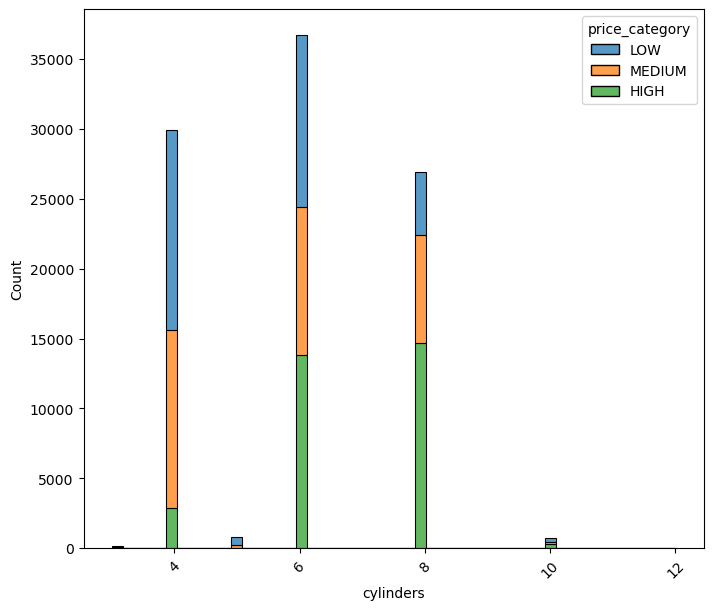

In [59]:
%matplotlib inline
plt.figure(figsize = (8,7))
sns.histplot(df, x = "cylinders", hue = "price_category", multiple = "stack")
plt.show()

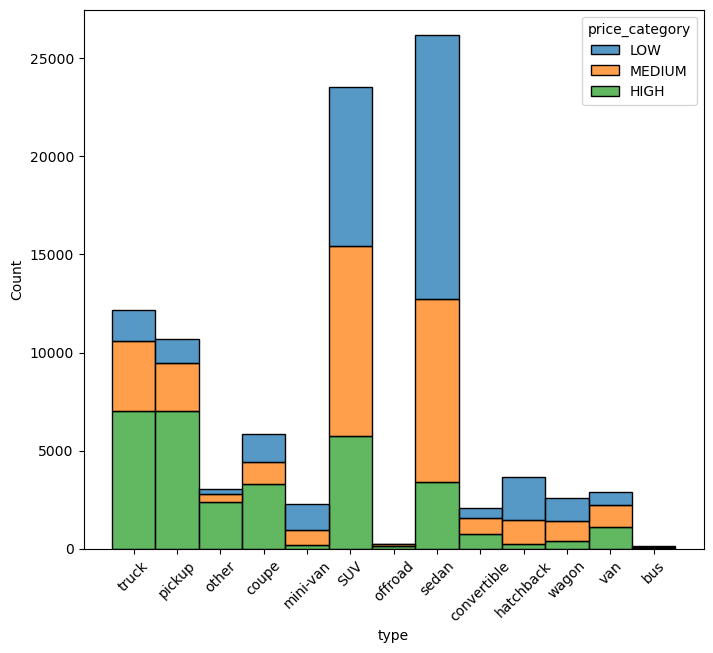

In [62]:
%matplotlib inline
plt.figure(figsize = (8,7))
sns.histplot(df, x = "type", hue = "price_category", multiple = "stack")
plt.xticks(rotation = 45)
plt.show()

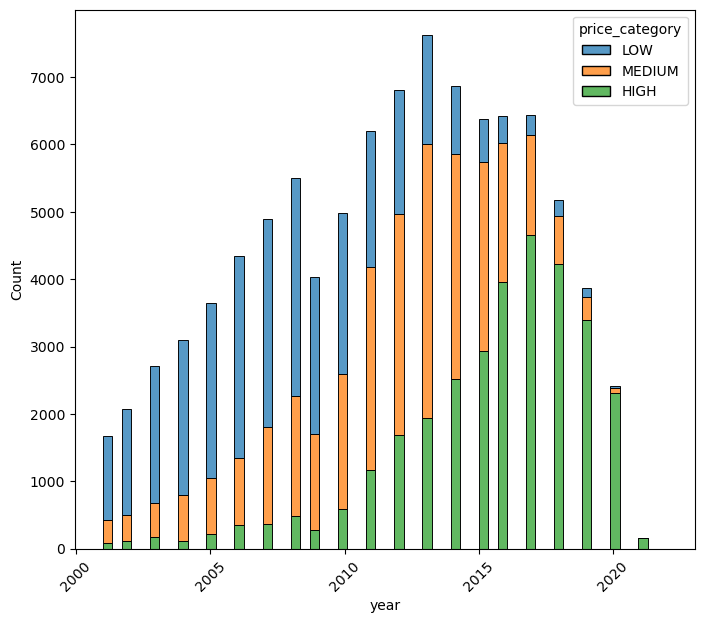

In [81]:
plt.figure(figsize = (8,7))
sns.histplot(df, x = "year", hue = "price_category", multiple = "stack")
plt.xticks(rotation = 45)
plt.show()

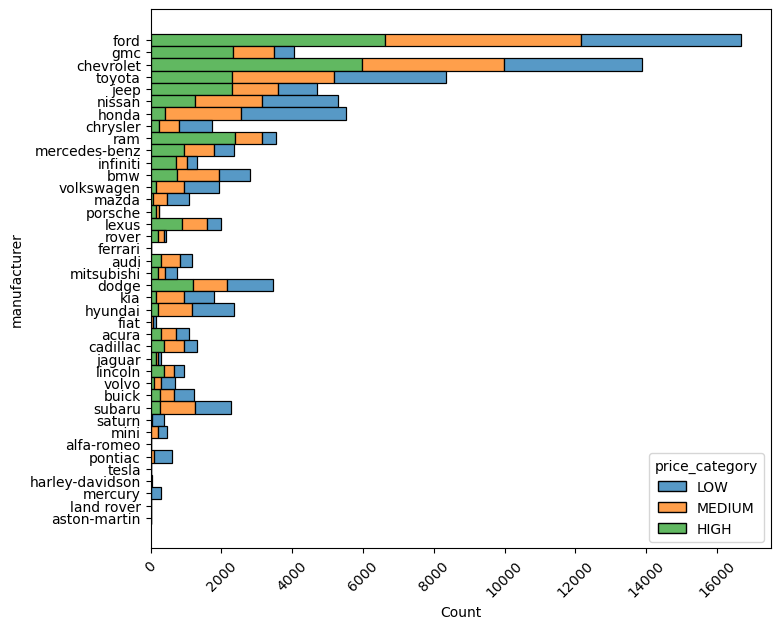

In [83]:
plt.figure(figsize = (8,7))
sns.histplot(df, y = "manufacturer", hue = "price_category", multiple = "stack")
plt.xticks(rotation = 45)
plt.show()

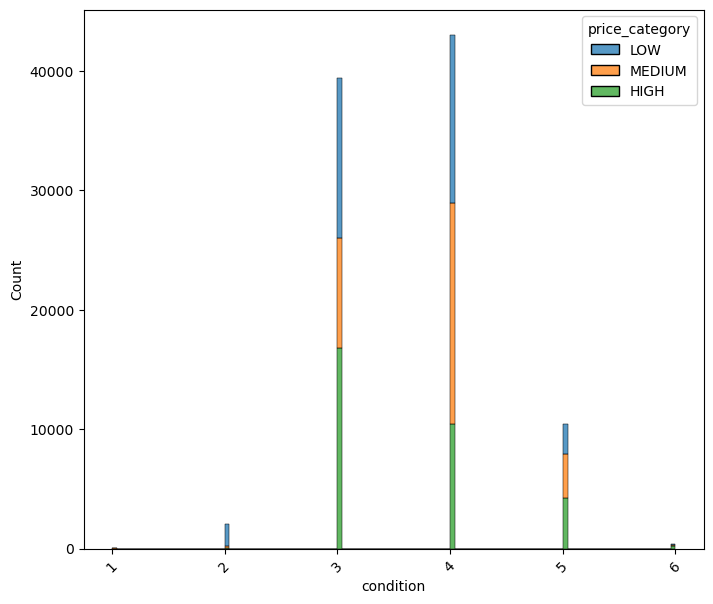

In [84]:
plt.figure(figsize = (8,7))
sns.histplot(df, x = "condition", hue = "price_category", multiple = "stack")
plt.xticks(rotation = 45)
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.